In [1]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Reshape, UpSampling2D, Flatten
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import Dense
import pandas as pd
import numpy as np
import cv2 as cv
from keras.models import Sequential
from keras.optimizers import Adam
from matplotlib.pyplot import imshow
%matplotlib inline
from keras.callbacks import TensorBoard
import random
import os
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
featInfo = pd.read_csv("15FeatureInfo.csv")
featInfo
featLen = [2,3,3,3,2,2,4,2,2,4,2,3,4,2,2]
len(featLen)

15

# AutoEncoder + Neural Network Model

Instructions for updating:
Colocations handled automatically by placer.


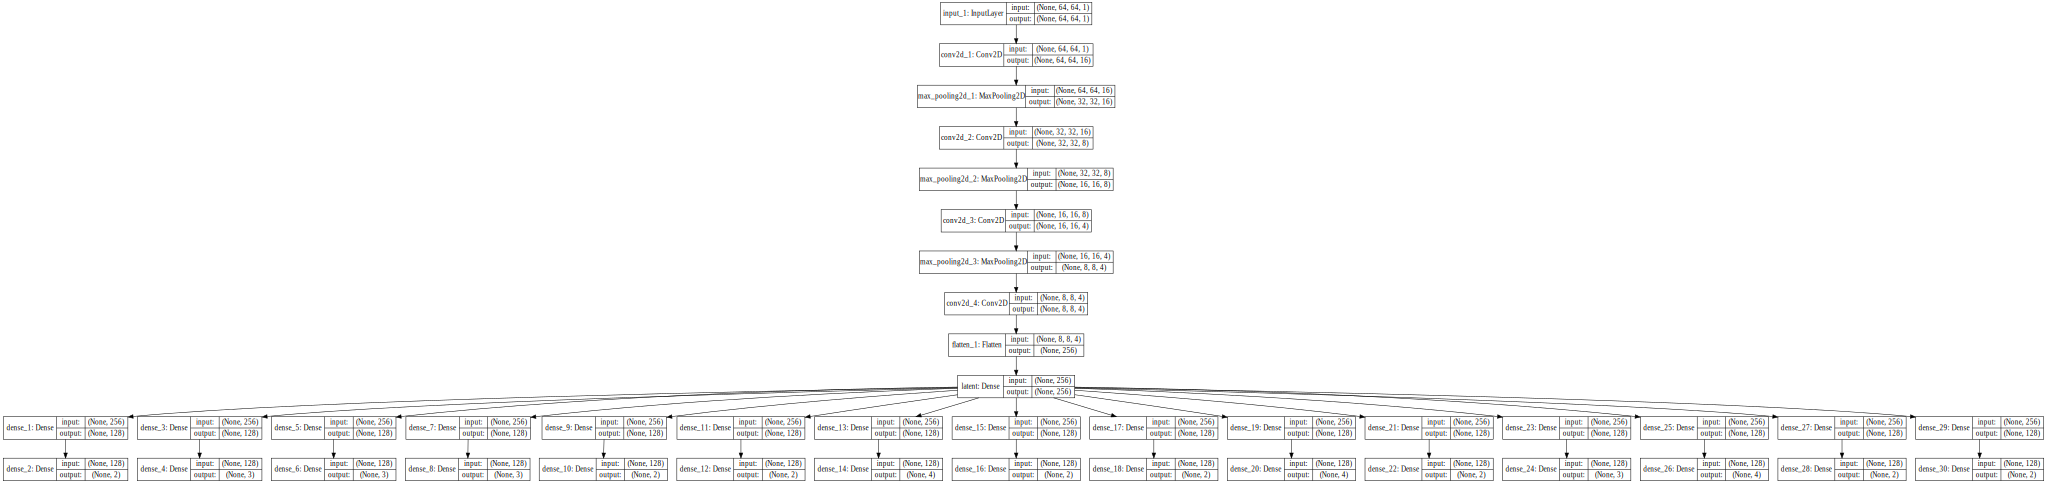

In [3]:

input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format
# x = CoordinateChannel2D()(input_img)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
# x = CoordinateChannel2D()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# x = CoordinateChannel2D()(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
encoded = Flatten()(x)
encoded = Dense(8*8*4, activation='relu', name='latent')(encoded)

#Pen_pressure
f1 = Dense(128, activation='relu')(encoded)
f1 = Dense(2, activation = 'softmax')(f1)

#Letter_spacing
f2 = Dense(128, activation='relu')(encoded)
f2 = Dense(3, activation = 'softmax')(f2)

#Size
f3 = Dense(128, activation='relu')(encoded)
f3 = Dense(3, activation = 'softmax')(f3)

#Dimension
f4 = Dense(128, activation='relu')(encoded)
f4 = Dense(3, activation = 'softmax')(f4)

#LowerCase
f5 = Dense(128, activation='relu')(encoded)
f5 = Dense(2, activation = 'softmax')(f5)
#Continuous
f6 = Dense(128, activation='relu')(encoded)
f6 = Dense(2, activation = 'softmax')(f6)
#Slantness
f7 = Dense(128, activation='relu')(encoded)
f7 = Dense(4, activation = 'softmax')(f7)
#Tilt
f8 = Dense(128, activation='relu')(encoded)
f8 = Dense(2, activation = 'softmax')(f8)

#Entry Stroke a
f9 = Dense(128, activation='relu')(encoded)
f9 = Dense(2, activation = 'softmax')(f9)
#Staff of a
f10 = Dense(128, activation='relu')(encoded)
f10 = Dense(4, activation = 'softmax')(f10)
#Formation of n
f11 = Dense(128, activation='relu')(encoded)
f11 = Dense(2, activation = 'softmax')(f11)
#Staff of d
f12 = Dense(128, activation='relu')(encoded)
f12 = Dense(3, activation = 'softmax')(f12)
#Exit Stroke d
f13 = Dense(128, activation='relu')(encoded)
f13 = Dense(4, activation = 'softmax')(f13)

#Word Formation
f14 = Dense(128, activation='relu')(encoded)
f14 = Dense(2, activation = 'softmax')(f14)

#Constancy
f15 = Dense(128, activation='relu')(encoded)
f15 = Dense(2, activation = 'softmax')(f15)

explainableSeen = Model(inputs = input_img, outputs = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15])
explainableSeen.compile(optimizer='adadelta', loss='categorical_crossentropy')
explainableShuffle = Model(inputs = input_img, outputs = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15])
explainableShuffle.compile(optimizer='adadelta', loss='categorical_crossentropy')
explainableUnseen = Model(inputs = input_img, outputs = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15])
explainableUnseen.compile(optimizer='adadelta', loss='categorical_crossentropy')
#autoencoder.summary()

#encoder = Model(input_img, encoded)
#encoder.summary()
display(SVG(model_to_dot(explainableSeen, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg')))


In [4]:
ds = pd.read_csv("15features.csv")
ds.iloc[:,1:] -= 1
#seenValidation = pd.read_csv("./seen-dataset/dataset_seen_validation_siamese.csv")
#seenTraining = pd.read_csv("./dataset_seen_training_siamese.csv")
#seenTraining = seenTraining.drop(seenTraining.columns[[0]],axis=1)
#seenValidation = seenValidation.drop(seenValidation.columns[[0]],axis=1)
imgSeenTrainLoc = "./seen-dataset/TrainingSet/"
imgSeenTestLoc = "./seen-dataset/ValidationSet/"
trainSeenImgsList = os.listdir(imgSeenTrainLoc)
testSeenImgsList = os.listdir(imgSeenTestLoc)
#trainSeenImgsList.sort()
#testSeenImgsList.sort()

cols = ds.columns.tolist()[1:]

trainSeenImgs = []
for i in range(len(trainSeenImgsList)):
    trainSeenImgs.append((cv.imread(imgSeenTrainLoc+trainSeenImgsList[i],0).astype('float')/255).reshape((64,64,1)))
trainSeenImgs = np.asarray(trainSeenImgs)
trainSeenImgs.shape

testSeenImgs = []
for i in range(len(testSeenImgsList)):
    testSeenImgs.append((cv.imread(imgSeenTestLoc+testSeenImgsList[i],0).astype('float')/255).reshape((64,64,1)))
testSeenImgs = np.asarray(testSeenImgs)
testSeenImgs.shape

(952, 64, 64, 1)

In [5]:
imgShuffleTrainLoc = "./shuffled-dataset/TrainingSet/"
imgShuffleTestLoc = "./shuffled-dataset/ValidationSet/"
trainShuffleImgsList = os.listdir(imgShuffleTrainLoc)
testShuffleImgsList = os.listdir(imgShuffleTestLoc)
#trainShuffleImgsList.sort()
#testShuffleImgsList.sort()


trainShuffleImgs = []
for i in range(len(trainShuffleImgsList)):
    trainShuffleImgs.append((cv.imread(imgShuffleTrainLoc+trainShuffleImgsList[i],0).astype('float')/255).reshape((64,64,1)))
trainShuffleImgs = np.asarray(trainShuffleImgs)
trainShuffleImgs.shape

testShuffleImgs = []
for i in range(len(testShuffleImgsList)):
    testShuffleImgs.append((cv.imread(imgShuffleTestLoc+testShuffleImgsList[i],0).astype('float')/255).reshape((64,64,1)))
testShuffleImgs = np.asarray(testShuffleImgs)
testShuffleImgs.shape

(1971, 64, 64, 1)

In [6]:
imgUnseenTrainLoc = "./Unseen-dataset/TrainingSet/"
imgUnseenTestLoc = "./Unseen-dataset/ValidationSet/"
trainUnseenImgsList = os.listdir(imgUnseenTrainLoc)
testUnseenImgsList = os.listdir(imgUnseenTestLoc)
#trainUnseenImgsList.sort()
#testUnseenImgsList.sort()


trainUnseenImgs = []
for i in range(len(trainUnseenImgsList)):
    trainUnseenImgs.append((cv.imread(imgUnseenTrainLoc+trainUnseenImgsList[i],0).astype('float')/255).reshape((64,64,1)))
trainUnseenImgs = np.asarray(trainUnseenImgs)
trainUnseenImgs.shape

testUnseenImgs = []
for i in range(len(testUnseenImgsList)):
    testUnseenImgs.append((cv.imread(imgUnseenTestLoc+testUnseenImgsList[i],0).astype('float')/255).reshape((64,64,1)))
testUnseenImgs = np.asarray(testUnseenImgs)
testUnseenImgs.shape

(888, 64, 64, 1)

# Data Generator for the Model
Input : List of imgs, Location, and Batch Size <br>
Output : Yields an Image and its corresponding features in one-hot encoding

In [7]:
def dataGenerator(imgList, imgLoc, bSize):
    count = 0
    while(True):
        imgs = []
        imgFeats = np.empty((15, 0)).tolist()
        imgIndexes = np.random.randint(0,len(imgList),bSize)
        for ind in imgIndexes:
            img = (cv.imread(imgLoc+imgList[ind],0)).reshape((64,64,1)).astype(float)/255.0
            try:
                imgFeat = ds[ds['imagename'] == imgList[ind]].iloc[0,1:].values.tolist()
                for i in range(len(cols)):
                    imgFeats[i].append(to_categorical(imgFeat[i], num_classes = featLen[i]).tolist())
            except:
                continue
            imgs.append(img)
            count+=1 
        yield np.asarray(imgs), imgFeats


In [8]:
# def train(model, numIters, imgList, imgLoc, bSize):
#     c=0
#     for batchData in dataGenerator(imgList, imgLoc, bSize):
#         if (c==numIters):
#             break
#         loss = model.train_on_batch(batchData[0], batchData[1])
#         print(loss)
#         c+=1
    

## Training the model using fit_generator

In [60]:
optimizer = Adam(lr = 0.00005)
explainableSeen.compile(optimizer= optimizer, loss = 'categorical_crossentropy')
histSeen = explainableSeen.fit_generator(dataGenerator(trainSeenImgsList, imgSeenTrainLoc, 128), epochs= 100, verbose=2, steps_per_epoch=64)

Epoch 1/100
 - 45s - loss: 7.2502 - dense_2_loss: 0.2967 - dense_4_loss: 0.8450 - dense_6_loss: 0.5058 - dense_8_loss: 0.5750 - dense_10_loss: 0.0209 - dense_12_loss: 0.3036 - dense_14_loss: 0.6869 - dense_16_loss: 0.3141 - dense_18_loss: 0.0838 - dense_20_loss: 0.9243 - dense_22_loss: 0.3707 - dense_24_loss: 0.4174 - dense_26_loss: 0.8321 - dense_28_loss: 0.5407 - dense_30_loss: 0.5332
Epoch 2/100
 - 40s - loss: 7.2115 - dense_2_loss: 0.2982 - dense_4_loss: 0.8473 - dense_6_loss: 0.4997 - dense_8_loss: 0.5614 - dense_10_loss: 0.0218 - dense_12_loss: 0.3072 - dense_14_loss: 0.6777 - dense_16_loss: 0.3260 - dense_18_loss: 0.0888 - dense_20_loss: 0.9110 - dense_22_loss: 0.3660 - dense_24_loss: 0.4017 - dense_26_loss: 0.8387 - dense_28_loss: 0.5373 - dense_30_loss: 0.5288
Epoch 3/100
 - 46s - loss: 7.2161 - dense_2_loss: 0.2809 - dense_4_loss: 0.8499 - dense_6_loss: 0.4958 - dense_8_loss: 0.5636 - dense_10_loss: 0.0222 - dense_12_loss: 0.3099 - dense_14_loss: 0.6654 - dense_16_loss: 0.338

Epoch 22/100
 - 42s - loss: 7.1362 - dense_2_loss: 0.2936 - dense_4_loss: 0.8416 - dense_6_loss: 0.5081 - dense_8_loss: 0.5560 - dense_10_loss: 0.0184 - dense_12_loss: 0.3025 - dense_14_loss: 0.6744 - dense_16_loss: 0.3266 - dense_18_loss: 0.0757 - dense_20_loss: 0.9226 - dense_22_loss: 0.3550 - dense_24_loss: 0.3984 - dense_26_loss: 0.8002 - dense_28_loss: 0.5402 - dense_30_loss: 0.5229
Epoch 23/100
 - 50s - loss: 7.1372 - dense_2_loss: 0.2860 - dense_4_loss: 0.8401 - dense_6_loss: 0.5033 - dense_8_loss: 0.5450 - dense_10_loss: 0.0252 - dense_12_loss: 0.3033 - dense_14_loss: 0.6669 - dense_16_loss: 0.3244 - dense_18_loss: 0.0844 - dense_20_loss: 0.9247 - dense_22_loss: 0.3534 - dense_24_loss: 0.4101 - dense_26_loss: 0.8068 - dense_28_loss: 0.5386 - dense_30_loss: 0.5248
Epoch 24/100
 - 44s - loss: 7.1922 - dense_2_loss: 0.2887 - dense_4_loss: 0.8548 - dense_6_loss: 0.5155 - dense_8_loss: 0.5657 - dense_10_loss: 0.0178 - dense_12_loss: 0.3064 - dense_14_loss: 0.6659 - dense_16_loss: 0.

Epoch 43/100
 - 36s - loss: 7.0665 - dense_2_loss: 0.2937 - dense_4_loss: 0.8365 - dense_6_loss: 0.4915 - dense_8_loss: 0.5428 - dense_10_loss: 0.0181 - dense_12_loss: 0.2901 - dense_14_loss: 0.6627 - dense_16_loss: 0.3269 - dense_18_loss: 0.0861 - dense_20_loss: 0.9073 - dense_22_loss: 0.3530 - dense_24_loss: 0.4040 - dense_26_loss: 0.8042 - dense_28_loss: 0.5309 - dense_30_loss: 0.5188
Epoch 44/100
 - 44s - loss: 7.0784 - dense_2_loss: 0.2905 - dense_4_loss: 0.8356 - dense_6_loss: 0.5005 - dense_8_loss: 0.5654 - dense_10_loss: 0.0181 - dense_12_loss: 0.2939 - dense_14_loss: 0.6737 - dense_16_loss: 0.3272 - dense_18_loss: 0.0826 - dense_20_loss: 0.8905 - dense_22_loss: 0.3480 - dense_24_loss: 0.3841 - dense_26_loss: 0.8196 - dense_28_loss: 0.5329 - dense_30_loss: 0.5158
Epoch 45/100
 - 41s - loss: 7.1323 - dense_2_loss: 0.2825 - dense_4_loss: 0.8425 - dense_6_loss: 0.5254 - dense_8_loss: 0.5517 - dense_10_loss: 0.0188 - dense_12_loss: 0.3012 - dense_14_loss: 0.6759 - dense_16_loss: 0.

Epoch 64/100
 - 35s - loss: 7.0307 - dense_2_loss: 0.2957 - dense_4_loss: 0.8361 - dense_6_loss: 0.4910 - dense_8_loss: 0.5540 - dense_10_loss: 0.0165 - dense_12_loss: 0.2914 - dense_14_loss: 0.6705 - dense_16_loss: 0.3150 - dense_18_loss: 0.0854 - dense_20_loss: 0.9017 - dense_22_loss: 0.3516 - dense_24_loss: 0.3916 - dense_26_loss: 0.7983 - dense_28_loss: 0.5212 - dense_30_loss: 0.5108
Epoch 65/100
 - 42s - loss: 7.0130 - dense_2_loss: 0.2935 - dense_4_loss: 0.8331 - dense_6_loss: 0.5018 - dense_8_loss: 0.5504 - dense_10_loss: 0.0195 - dense_12_loss: 0.2859 - dense_14_loss: 0.6589 - dense_16_loss: 0.3237 - dense_18_loss: 0.0771 - dense_20_loss: 0.8974 - dense_22_loss: 0.3516 - dense_24_loss: 0.3883 - dense_26_loss: 0.7852 - dense_28_loss: 0.5252 - dense_30_loss: 0.5214
Epoch 66/100
 - 40s - loss: 7.0375 - dense_2_loss: 0.2895 - dense_4_loss: 0.8250 - dense_6_loss: 0.4809 - dense_8_loss: 0.5629 - dense_10_loss: 0.0156 - dense_12_loss: 0.3020 - dense_14_loss: 0.6666 - dense_16_loss: 0.

Epoch 85/100
 - 45s - loss: 6.9821 - dense_2_loss: 0.2732 - dense_4_loss: 0.8285 - dense_6_loss: 0.5073 - dense_8_loss: 0.5507 - dense_10_loss: 0.0149 - dense_12_loss: 0.2871 - dense_14_loss: 0.6443 - dense_16_loss: 0.3173 - dense_18_loss: 0.0753 - dense_20_loss: 0.9108 - dense_22_loss: 0.3448 - dense_24_loss: 0.3930 - dense_26_loss: 0.7883 - dense_28_loss: 0.5277 - dense_30_loss: 0.5188
Epoch 86/100
 - 44s - loss: 6.9627 - dense_2_loss: 0.2915 - dense_4_loss: 0.8335 - dense_6_loss: 0.5013 - dense_8_loss: 0.5470 - dense_10_loss: 0.0134 - dense_12_loss: 0.2770 - dense_14_loss: 0.6529 - dense_16_loss: 0.3076 - dense_18_loss: 0.0843 - dense_20_loss: 0.8999 - dense_22_loss: 0.3481 - dense_24_loss: 0.3878 - dense_26_loss: 0.7882 - dense_28_loss: 0.5220 - dense_30_loss: 0.5081
Epoch 87/100
 - 39s - loss: 6.9402 - dense_2_loss: 0.2808 - dense_4_loss: 0.8289 - dense_6_loss: 0.5030 - dense_8_loss: 0.5559 - dense_10_loss: 0.0129 - dense_12_loss: 0.2802 - dense_14_loss: 0.6551 - dense_16_loss: 0.

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb3db9eba8>,
      dtype=object)

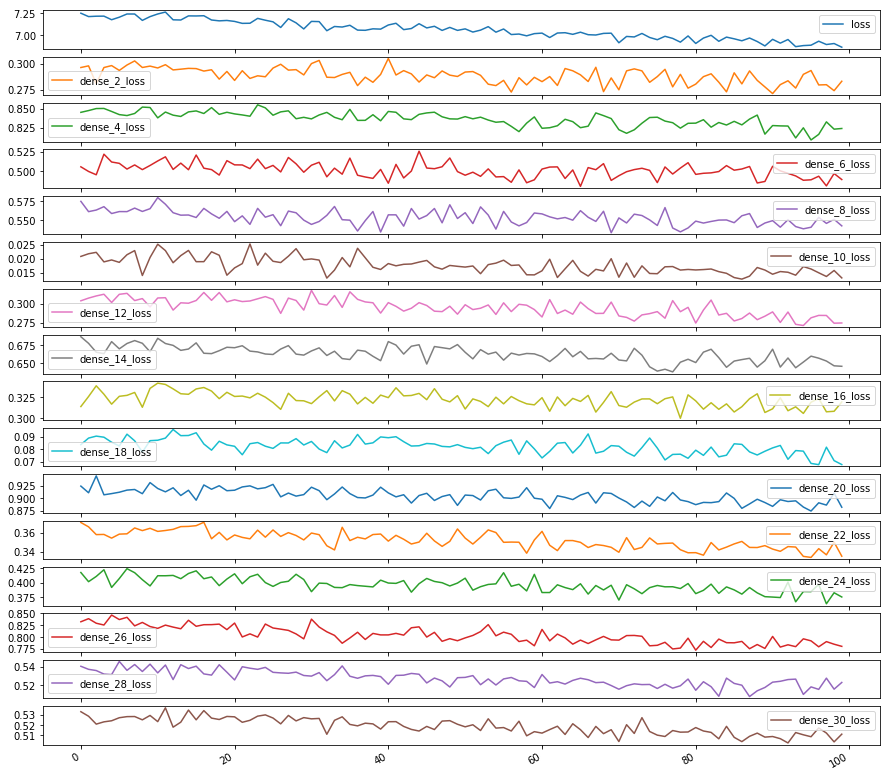

In [64]:
df_hist = pd.DataFrame(histSeen.history)
df_hist.plot(subplots=True, figsize=(15,15))

In [11]:
optimizer = Adam(lr = 0.00005)
explainableShuffle.compile(optimizer= optimizer, loss = 'categorical_crossentropy')
histShuffle = explainableShuffle.fit_generator(dataGenerator(trainShuffleImgsList, imgShuffleTrainLoc, 128), epochs= 100, verbose=2, steps_per_epoch=64)

Epoch 1/100
 - 74s - loss: 7.7760 - dense_2_loss: 0.3062 - dense_4_loss: 0.8774 - dense_6_loss: 0.5289 - dense_8_loss: 0.5653 - dense_10_loss: 0.0265 - dense_12_loss: 0.3567 - dense_14_loss: 0.7260 - dense_16_loss: 0.3641 - dense_18_loss: 0.1110 - dense_20_loss: 0.9991 - dense_22_loss: 0.4089 - dense_24_loss: 0.4693 - dense_26_loss: 0.9111 - dense_28_loss: 0.5673 - dense_30_loss: 0.5581
Epoch 2/100
 - 86s - loss: 7.6969 - dense_2_loss: 0.3012 - dense_4_loss: 0.8839 - dense_6_loss: 0.5321 - dense_8_loss: 0.5712 - dense_10_loss: 0.0293 - dense_12_loss: 0.3454 - dense_14_loss: 0.7149 - dense_16_loss: 0.3559 - dense_18_loss: 0.1033 - dense_20_loss: 0.9906 - dense_22_loss: 0.4001 - dense_24_loss: 0.4570 - dense_26_loss: 0.8966 - dense_28_loss: 0.5536 - dense_30_loss: 0.5617
Epoch 3/100
 - 84s - loss: 7.7122 - dense_2_loss: 0.3032 - dense_4_loss: 0.8697 - dense_6_loss: 0.5172 - dense_8_loss: 0.5579 - dense_10_loss: 0.0287 - dense_12_loss: 0.3495 - dense_14_loss: 0.7269 - dense_16_loss: 0.343

Epoch 22/100
 - 62s - loss: 7.6147 - dense_2_loss: 0.2970 - dense_4_loss: 0.8784 - dense_6_loss: 0.5103 - dense_8_loss: 0.5537 - dense_10_loss: 0.0316 - dense_12_loss: 0.3467 - dense_14_loss: 0.7227 - dense_16_loss: 0.3489 - dense_18_loss: 0.1000 - dense_20_loss: 0.9744 - dense_22_loss: 0.4020 - dense_24_loss: 0.4426 - dense_26_loss: 0.8917 - dense_28_loss: 0.5565 - dense_30_loss: 0.5580
Epoch 23/100
 - 61s - loss: 7.5775 - dense_2_loss: 0.3128 - dense_4_loss: 0.8771 - dense_6_loss: 0.5064 - dense_8_loss: 0.5768 - dense_10_loss: 0.0275 - dense_12_loss: 0.3424 - dense_14_loss: 0.6986 - dense_16_loss: 0.3323 - dense_18_loss: 0.0969 - dense_20_loss: 0.9669 - dense_22_loss: 0.3966 - dense_24_loss: 0.4580 - dense_26_loss: 0.8777 - dense_28_loss: 0.5539 - dense_30_loss: 0.5534
Epoch 24/100
 - 63s - loss: 7.6160 - dense_2_loss: 0.3031 - dense_4_loss: 0.8732 - dense_6_loss: 0.5107 - dense_8_loss: 0.5577 - dense_10_loss: 0.0234 - dense_12_loss: 0.3474 - dense_14_loss: 0.7166 - dense_16_loss: 0.

Epoch 43/100
 - 62s - loss: 7.5027 - dense_2_loss: 0.2938 - dense_4_loss: 0.8651 - dense_6_loss: 0.5092 - dense_8_loss: 0.5628 - dense_10_loss: 0.0249 - dense_12_loss: 0.3301 - dense_14_loss: 0.7049 - dense_16_loss: 0.3427 - dense_18_loss: 0.0975 - dense_20_loss: 0.9655 - dense_22_loss: 0.3991 - dense_24_loss: 0.4501 - dense_26_loss: 0.8745 - dense_28_loss: 0.5350 - dense_30_loss: 0.5474
Epoch 44/100
 - 60s - loss: 7.4880 - dense_2_loss: 0.3002 - dense_4_loss: 0.8621 - dense_6_loss: 0.5102 - dense_8_loss: 0.5515 - dense_10_loss: 0.0218 - dense_12_loss: 0.3361 - dense_14_loss: 0.7143 - dense_16_loss: 0.3371 - dense_18_loss: 0.1013 - dense_20_loss: 0.9530 - dense_22_loss: 0.3955 - dense_24_loss: 0.4452 - dense_26_loss: 0.8699 - dense_28_loss: 0.5433 - dense_30_loss: 0.5464
Epoch 45/100
 - 61s - loss: 7.5269 - dense_2_loss: 0.2970 - dense_4_loss: 0.8638 - dense_6_loss: 0.5267 - dense_8_loss: 0.5577 - dense_10_loss: 0.0184 - dense_12_loss: 0.3251 - dense_14_loss: 0.7192 - dense_16_loss: 0.

Epoch 64/100
 - 60s - loss: 7.3891 - dense_2_loss: 0.2908 - dense_4_loss: 0.8544 - dense_6_loss: 0.5141 - dense_8_loss: 0.5434 - dense_10_loss: 0.0196 - dense_12_loss: 0.3214 - dense_14_loss: 0.6979 - dense_16_loss: 0.3309 - dense_18_loss: 0.0935 - dense_20_loss: 0.9504 - dense_22_loss: 0.3836 - dense_24_loss: 0.4442 - dense_26_loss: 0.8559 - dense_28_loss: 0.5417 - dense_30_loss: 0.5473
Epoch 65/100
 - 60s - loss: 7.4491 - dense_2_loss: 0.3022 - dense_4_loss: 0.8632 - dense_6_loss: 0.5199 - dense_8_loss: 0.5583 - dense_10_loss: 0.0192 - dense_12_loss: 0.3245 - dense_14_loss: 0.7046 - dense_16_loss: 0.3401 - dense_18_loss: 0.0929 - dense_20_loss: 0.9689 - dense_22_loss: 0.3890 - dense_24_loss: 0.4312 - dense_26_loss: 0.8497 - dense_28_loss: 0.5403 - dense_30_loss: 0.5448
Epoch 66/100
 - 61s - loss: 7.4138 - dense_2_loss: 0.2904 - dense_4_loss: 0.8650 - dense_6_loss: 0.5071 - dense_8_loss: 0.5508 - dense_10_loss: 0.0238 - dense_12_loss: 0.3306 - dense_14_loss: 0.7031 - dense_16_loss: 0.

Epoch 85/100
 - 59s - loss: 7.3121 - dense_2_loss: 0.2819 - dense_4_loss: 0.8460 - dense_6_loss: 0.4941 - dense_8_loss: 0.5445 - dense_10_loss: 0.0166 - dense_12_loss: 0.3128 - dense_14_loss: 0.6851 - dense_16_loss: 0.3487 - dense_18_loss: 0.0926 - dense_20_loss: 0.9451 - dense_22_loss: 0.3864 - dense_24_loss: 0.4427 - dense_26_loss: 0.8506 - dense_28_loss: 0.5313 - dense_30_loss: 0.5336
Epoch 86/100
 - 59s - loss: 7.3079 - dense_2_loss: 0.2824 - dense_4_loss: 0.8605 - dense_6_loss: 0.5057 - dense_8_loss: 0.5538 - dense_10_loss: 0.0208 - dense_12_loss: 0.3043 - dense_14_loss: 0.6913 - dense_16_loss: 0.3410 - dense_18_loss: 0.0929 - dense_20_loss: 0.9317 - dense_22_loss: 0.3796 - dense_24_loss: 0.4238 - dense_26_loss: 0.8479 - dense_28_loss: 0.5354 - dense_30_loss: 0.5368
Epoch 87/100
 - 50s - loss: 7.2967 - dense_2_loss: 0.2831 - dense_4_loss: 0.8593 - dense_6_loss: 0.4935 - dense_8_loss: 0.5435 - dense_10_loss: 0.0183 - dense_12_loss: 0.3085 - dense_14_loss: 0.6811 - dense_16_loss: 0.

array([<matplotlib.axes._subplots.AxesSubplot object at 0xba42447f0>,
      dtype=object)

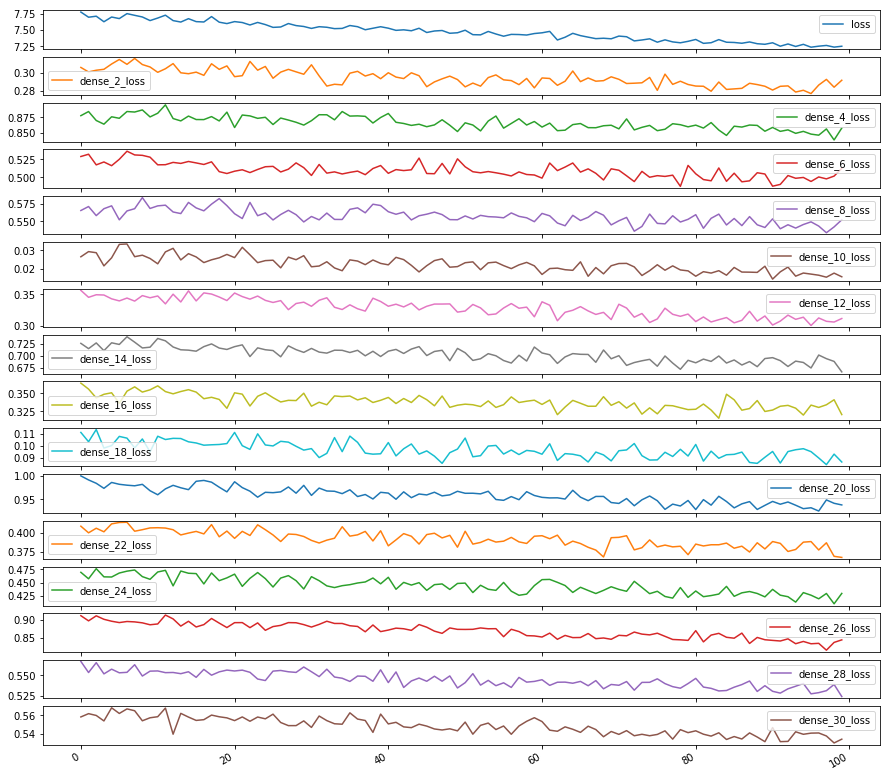

In [65]:
df_hist = pd.DataFrame(histShuffle.history)
df_hist.plot(subplots=True, figsize=(15,15))

In [50]:
optimizer = Adam(lr = 0.000005)
explainableUnseen.compile(optimizer= optimizer, loss = 'categorical_crossentropy')
histUnseen = explainableUnseen.fit_generator(dataGenerator(trainUnseenImgsList, imgUnseenTrainLoc, 128), epochs= 100, verbose=2, steps_per_epoch=64)

Epoch 1/100
 - 45s - loss: 7.2561 - dense_2_loss: 0.2966 - dense_4_loss: 0.8387 - dense_6_loss: 0.5093 - dense_8_loss: 0.5503 - dense_10_loss: 0.0243 - dense_12_loss: 0.3127 - dense_14_loss: 0.6871 - dense_16_loss: 0.3316 - dense_18_loss: 0.0871 - dense_20_loss: 0.9411 - dense_22_loss: 0.3799 - dense_24_loss: 0.4100 - dense_26_loss: 0.8222 - dense_28_loss: 0.5314 - dense_30_loss: 0.5337
Epoch 2/100
 - 44s - loss: 7.2974 - dense_2_loss: 0.3038 - dense_4_loss: 0.8653 - dense_6_loss: 0.5245 - dense_8_loss: 0.5606 - dense_10_loss: 0.0237 - dense_12_loss: 0.3140 - dense_14_loss: 0.6841 - dense_16_loss: 0.3322 - dense_18_loss: 0.0887 - dense_20_loss: 0.9293 - dense_22_loss: 0.3528 - dense_24_loss: 0.4136 - dense_26_loss: 0.8289 - dense_28_loss: 0.5413 - dense_30_loss: 0.5347
Epoch 3/100
 - 42s - loss: 7.2627 - dense_2_loss: 0.2934 - dense_4_loss: 0.8515 - dense_6_loss: 0.5189 - dense_8_loss: 0.5758 - dense_10_loss: 0.0184 - dense_12_loss: 0.3131 - dense_14_loss: 0.6809 - dense_16_loss: 0.325

Epoch 22/100
 - 33s - loss: 7.2538 - dense_2_loss: 0.2999 - dense_4_loss: 0.8571 - dense_6_loss: 0.5088 - dense_8_loss: 0.5725 - dense_10_loss: 0.0199 - dense_12_loss: 0.3247 - dense_14_loss: 0.6720 - dense_16_loss: 0.3158 - dense_18_loss: 0.0939 - dense_20_loss: 0.9261 - dense_22_loss: 0.3615 - dense_24_loss: 0.4094 - dense_26_loss: 0.8220 - dense_28_loss: 0.5418 - dense_30_loss: 0.5284
Epoch 23/100
 - 34s - loss: 7.2336 - dense_2_loss: 0.2861 - dense_4_loss: 0.8593 - dense_6_loss: 0.5050 - dense_8_loss: 0.5656 - dense_10_loss: 0.0208 - dense_12_loss: 0.2971 - dense_14_loss: 0.6656 - dense_16_loss: 0.3152 - dense_18_loss: 0.0933 - dense_20_loss: 0.9202 - dense_22_loss: 0.3669 - dense_24_loss: 0.4108 - dense_26_loss: 0.8314 - dense_28_loss: 0.5483 - dense_30_loss: 0.5479
Epoch 24/100
 - 33s - loss: 7.2513 - dense_2_loss: 0.2925 - dense_4_loss: 0.8430 - dense_6_loss: 0.5020 - dense_8_loss: 0.5628 - dense_10_loss: 0.0250 - dense_12_loss: 0.3120 - dense_14_loss: 0.6739 - dense_16_loss: 0.

Epoch 43/100
 - 43s - loss: 7.2309 - dense_2_loss: 0.3006 - dense_4_loss: 0.8491 - dense_6_loss: 0.5036 - dense_8_loss: 0.5594 - dense_10_loss: 0.0223 - dense_12_loss: 0.3026 - dense_14_loss: 0.6572 - dense_16_loss: 0.3290 - dense_18_loss: 0.0834 - dense_20_loss: 0.9329 - dense_22_loss: 0.3572 - dense_24_loss: 0.4184 - dense_26_loss: 0.8398 - dense_28_loss: 0.5481 - dense_30_loss: 0.5271
Epoch 44/100
 - 41s - loss: 7.2085 - dense_2_loss: 0.2970 - dense_4_loss: 0.8467 - dense_6_loss: 0.5097 - dense_8_loss: 0.5840 - dense_10_loss: 0.0211 - dense_12_loss: 0.3036 - dense_14_loss: 0.6671 - dense_16_loss: 0.3360 - dense_18_loss: 0.0838 - dense_20_loss: 0.9046 - dense_22_loss: 0.3571 - dense_24_loss: 0.4061 - dense_26_loss: 0.8216 - dense_28_loss: 0.5367 - dense_30_loss: 0.5335
Epoch 45/100
 - 42s - loss: 7.2103 - dense_2_loss: 0.2970 - dense_4_loss: 0.8593 - dense_6_loss: 0.5089 - dense_8_loss: 0.5596 - dense_10_loss: 0.0200 - dense_12_loss: 0.3079 - dense_14_loss: 0.6720 - dense_16_loss: 0.

Epoch 64/100
 - 41s - loss: 7.1679 - dense_2_loss: 0.2836 - dense_4_loss: 0.8457 - dense_6_loss: 0.4981 - dense_8_loss: 0.5628 - dense_10_loss: 0.0214 - dense_12_loss: 0.3084 - dense_14_loss: 0.6656 - dense_16_loss: 0.3271 - dense_18_loss: 0.0888 - dense_20_loss: 0.9179 - dense_22_loss: 0.3627 - dense_24_loss: 0.4100 - dense_26_loss: 0.8109 - dense_28_loss: 0.5330 - dense_30_loss: 0.5319
Epoch 65/100
 - 38s - loss: 7.2053 - dense_2_loss: 0.2984 - dense_4_loss: 0.8414 - dense_6_loss: 0.5098 - dense_8_loss: 0.5610 - dense_10_loss: 0.0162 - dense_12_loss: 0.3047 - dense_14_loss: 0.6780 - dense_16_loss: 0.3279 - dense_18_loss: 0.0894 - dense_20_loss: 0.9171 - dense_22_loss: 0.3670 - dense_24_loss: 0.4141 - dense_26_loss: 0.8217 - dense_28_loss: 0.5354 - dense_30_loss: 0.5231
Epoch 66/100
 - 43s - loss: 7.2525 - dense_2_loss: 0.3036 - dense_4_loss: 0.8483 - dense_6_loss: 0.5107 - dense_8_loss: 0.5639 - dense_10_loss: 0.0198 - dense_12_loss: 0.3208 - dense_14_loss: 0.6779 - dense_16_loss: 0.

Epoch 85/100
 - 37s - loss: 7.2207 - dense_2_loss: 0.2968 - dense_4_loss: 0.8509 - dense_6_loss: 0.5093 - dense_8_loss: 0.5698 - dense_10_loss: 0.0179 - dense_12_loss: 0.3101 - dense_14_loss: 0.6671 - dense_16_loss: 0.3130 - dense_18_loss: 0.0952 - dense_20_loss: 0.9355 - dense_22_loss: 0.3669 - dense_24_loss: 0.4168 - dense_26_loss: 0.8173 - dense_28_loss: 0.5273 - dense_30_loss: 0.5268
Epoch 86/100
 - 40s - loss: 7.2134 - dense_2_loss: 0.2937 - dense_4_loss: 0.8425 - dense_6_loss: 0.5158 - dense_8_loss: 0.5538 - dense_10_loss: 0.0224 - dense_12_loss: 0.3111 - dense_14_loss: 0.6646 - dense_16_loss: 0.3228 - dense_18_loss: 0.0951 - dense_20_loss: 0.9337 - dense_22_loss: 0.3597 - dense_24_loss: 0.4075 - dense_26_loss: 0.8188 - dense_28_loss: 0.5399 - dense_30_loss: 0.5318
Epoch 87/100
 - 37s - loss: 7.2349 - dense_2_loss: 0.2891 - dense_4_loss: 0.8534 - dense_6_loss: 0.5330 - dense_8_loss: 0.5741 - dense_10_loss: 0.0212 - dense_12_loss: 0.3042 - dense_14_loss: 0.6693 - dense_16_loss: 0.

array([<matplotlib.axes._subplots.AxesSubplot object at 0xba5a06a90>,
      dtype=object)

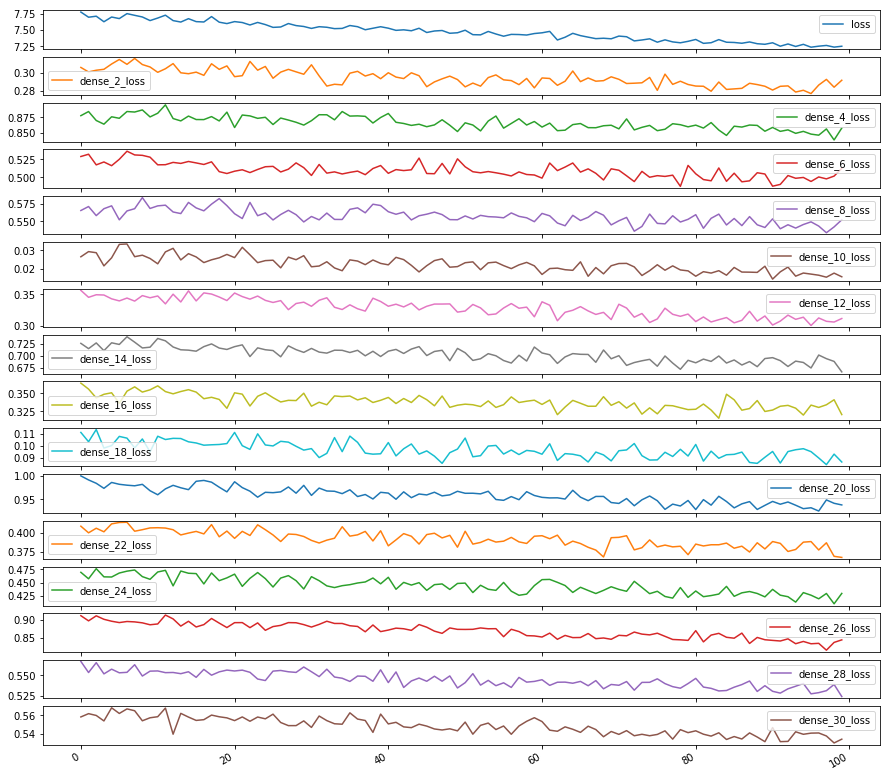

In [66]:
df_hist = pd.DataFrame(histShuffle.history)
df_hist.plot(subplots=True, figsize=(15,15))

## Predicting Accuracy of Model

In [17]:
def calAccuracy(model, testImgs, testImgsList, thres):
    pred = model.predict(testImgs)
    #len(pred[0])

    noFeat = []        #Images which do not have features given
    actFeat = []
    #Find Actual features given by hand
    for i in range(len(pred[0])):
        f = ds[ds['imagename'] == testImgsList[i]].iloc[:,1:].values.tolist()
        if f != []:
            actFeat.append(f[0])
        else:
            noFeat.append(i)
    
    #Removes one-hot Encoding to the predicted Features
    predFeats = np.empty((len(pred[0]), 0)).tolist()
    for i in range(len(featLen)):
        ft = np.argmax(pred[i],axis=1)
        for j in range(len(predFeats)):
            if j not in noFeat:
                predFeats[j].append(ft[j])
    
    #To remove empty lists
    c = predFeats.count([])
    for i in range(c):
        predFeats.remove([])
    len(predFeats)

    #prediction
    threshold = thres
    count = 0
    for i in range(len(actFeat)):
        if ((np.asarray(actFeat[i]) == np.asarray(predFeats[i])).sum() > threshold):
            count+=1
    acc = count/len(predFeats)*100
    return predFeats, actFeat, acc

## Explaining the Features

In [55]:
def explain(testImgsList, testImgs, predFeats, index):
    #ind = np.random.randint(0,len(testImgsList),1)
    ind = [index]
    for j in range(len(ind)):
        print ("Predicted Features : ")
        for i in range(len(cols)):
            print(cols[i] +":\t" + featInfo[cols[i]][predFeats[ind[j]][i]],)
        imshow(testImgs[ind[j]].reshape(64,64))


## Seen Dataset

In [63]:
seenPredFeats, seenActFeat, seenAcc = calAccuracy(explainableSeen, testSeenImgs, testSeenImgsList, 10)

Predicted Features : 
pen_pressure:	Strong
letter_spacing:	Medium
size:	Medium
dimension:	Medium
is_lowercase:	Yes
is_continuous:	Yes
slantness:	left
tilt:	normal
entry_stroke_a:	no stroke
staff_of_a:	retraced
formation_n:	normal
staff_of_d:	retraced
exit_stroke_d:	downstroke
word_formation:	Well Formed
constancy:	Regular


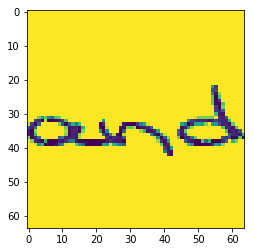

In [56]:
explain(testSeenImgsList,testSeenImgs, seenPredFeats, 1)

## Shuffled Dataset

In [ ]:
shufflePredFeats, shuffleActFeat, shuffleAcc = calAccuracy(explainableShuffle, testShuffleImgs, testShuffleImgsList, 10)

Predicted Features : 
pen_pressure:	Strong
letter_spacing:	High
size:	Large
dimension:	High
is_lowercase:	No
is_continuous:	No
slantness:	normal
tilt:	normal
entry_stroke_a:	no stroke
staff_of_a:	no staff
formation_n:	normal
staff_of_d:	no staff
exit_stroke_d:	no stroke
word_formation:	Well Formed
constancy:	Regular


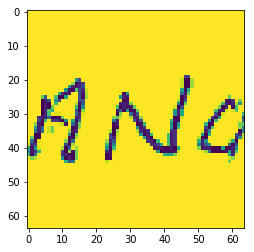

In [61]:
explain(testShuffleImgsList, testShuffleImgs, shufflePredFeats, 2)

## Unseen Dataset

Predicted Features : 
pen_pressure:	Medium
letter_spacing:	Medium
size:	Medium
dimension:	Medium
is_lowercase:	Yes
is_continuous:	Yes
slantness:	slight right 
tilt:	normal
entry_stroke_a:	no stroke
staff_of_a:	retraced
formation_n:	normal
staff_of_d:	loopy
exit_stroke_d:	downstroke
word_formation:	Not well formed
constancy:	Irregular


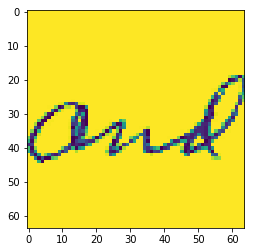

In [58]:
unseenPredFeats, unseenActFeat, unseenAcc = calAccuracy(explainableUnseen, testUnseenImgs, testUnseenImgsList, 10)
explain(testUnseenImgsList,testUnseenImgs, unseenPredFeats, 1)


In [59]:
print ("Seen Accuracy :",seenAcc)
print ("Shuffle Accuracy :", shuffleAcc)
print ("Unseen Accuracy :", unseenAcc)

Seen Accuracy : 79.13135593220339
Shuffle Accuracy : 77.7948717948718
Unseen Accuracy : 79.16181606519208


In [62]:
explainableSeen.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 8)    1160        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin